# Plotting Eddy Trajectories

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fpath='/gscratch/jisao/mclaret/GL64/Juin_500m/'
f = h5py.File(fpath + 'eddy_tracks.mat')
print(list(f.keys()))

['#refs#', 'tracks', 'warn_tracks']


In [33]:
tracks = f['tracks']
print(list(tracks))

['Rd', 'aire1', 'aire2', 'aire3', 'calcul', 'dc', 'deta1', 'deta2', 'deta3', 'ellip1', 'ellip2', 'f', 'gama', 'ind', 'ind2', 'interaction', 'interaction2', 'large1', 'large2', 'nrho1', 'nrho2', 'nrho3', 'rmax1', 'rmax2', 'rmax3', 'shapes1', 'shapes2', 'shapes3', 'step', 'tau1', 'tau2', 'theta1', 'theta2', 'type', 'velmax1', 'velmax2', 'velmax3', 'weak', 'x1', 'x2', 'xbary1', 'xbary2', 'y1', 'y2', 'ybary1', 'ybary2']


In [4]:
print(tracks['x1'][0])

[<HDF5 object reference>]


In [31]:
print(len(tracks['x1']))

43


In [41]:
a = np.array(f[tracks['step'][42,0]][(0)])
print(a)

[20. 21. 22. 23. 24.]


Number of eddies: 43


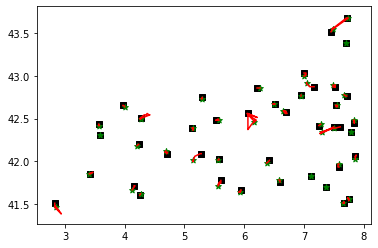

In [7]:
ntracks = len(tracks['x1'])  # number of eddies
print('Number of eddies:', ntracks)

# plot eddy trajectories
for itrack in range(0, ntracks):
    lftm = len(f[tracks['step'][itrack,0]][(0)])        # lifetime of eddy in timesteps
    plt.plot(f[tracks['x1'][itrack,0]][(0)],
             f[tracks['y1'][itrack,0]][(0)],
             color='r')                                 # trajectory between initial and final
    plt.scatter(f[tracks['x1'][itrack,0]][(0,0)],
                f[tracks['y1'][itrack,0]][(0,0)],
                marker='s', color='k')                  # initial position of the eddy
    plt.scatter(f[tracks['x1'][itrack,0]][(0,lftm-1)],
                f[tracks['y1'][itrack,0]][(0,lftm-1)],
                marker='*', color='g')                  # final position of the eddy
#plt.xlim(7, 8)
#plt.ylim(42, 43)
plt.show()

## Adding to Contour Plot

In [8]:
from scipy.io import netcdf

In [9]:
# import file
fpath = '/gscratch/jisao/mclaret/GL64/'
gridT_k1 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridT_k1.nc','r')

# keep variables
lat = gridT_k1.variables['nav_lat'][:][:].copy()
lon = gridT_k1.variables['nav_lon'][:][:].copy()
temp_t0 = gridT_k1.variables['votemper'][0][0][:][:].copy()
gridT_k1.close()

Number of eddies: 43


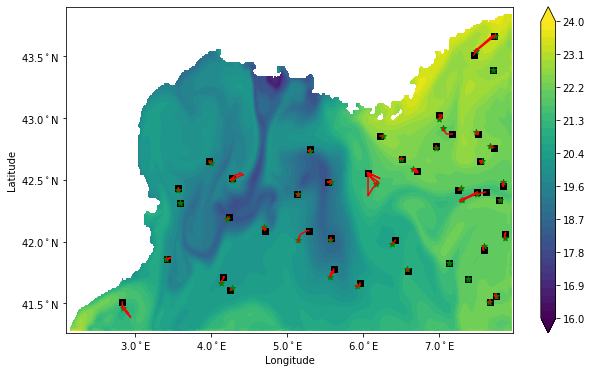

In [35]:
# set break intervals
breaks = np.linspace(16,24,40)
bticks = np.linspace(16,24,10)

# prepare figure
plt.figure(1, figsize=(10,6))

# mask land with white (value = 0.0)
temp_t0 = np.ma.masked_where(temp_t0 == 0.0, temp_t0)
cmap = plt.cm.OrRd
cmap.set_bad(color='w')

# plot temperatures
t_map = plt.contourf(lon, lat, temp_t0, breaks, extend='both')
plt.colorbar(t_map, format='%.1f', ticks=bticks)

# plot eddies
ntracks = len(tracks['x1'])  # number of eddies
print('Number of eddies:', ntracks)

# plot eddy trajectories
for itrack in range(0, ntracks):
    lftm = len(f[tracks['step'][itrack,0]][(0)])        # lifetime of eddy in timesteps
    #if lftm > 240:
    plt.plot(f[tracks['x1'][itrack,0]][(0)],            # trajectory between initial and final
             f[tracks['y1'][itrack,0]][(0)],
             color='r')
    plt.scatter(f[tracks['x1'][itrack,0]][(0,0)],       # initial position of the eddy
                f[tracks['y1'][itrack,0]][(0,0)],
                marker='s', color='k')
    plt.scatter(f[tracks['x1'][itrack,0]][(0,lftm-1)],  # final position of the eddy
                f[tracks['y1'][itrack,0]][(0,lftm-1)],
                marker='*', color='g')

# format lat/long labels
locs, labels = plt.xticks()
Elabels = [str(loc) + '$^\circ$E' for loc in locs]
plt.xticks(locs[1:-1], Elabels[1:-1])
locs, labels = plt.yticks()
Nlabels = [str(loc) + '$^\circ$N' for loc in locs]
plt.yticks(locs[1:-1], Nlabels[1:-1])

# figure labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()